C:\Users\PCAdmin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Trend Projection Equation:  y = -0.10 * period + 214.86
Next Period (2011) Forecast: 7.12
MAD: 0.68


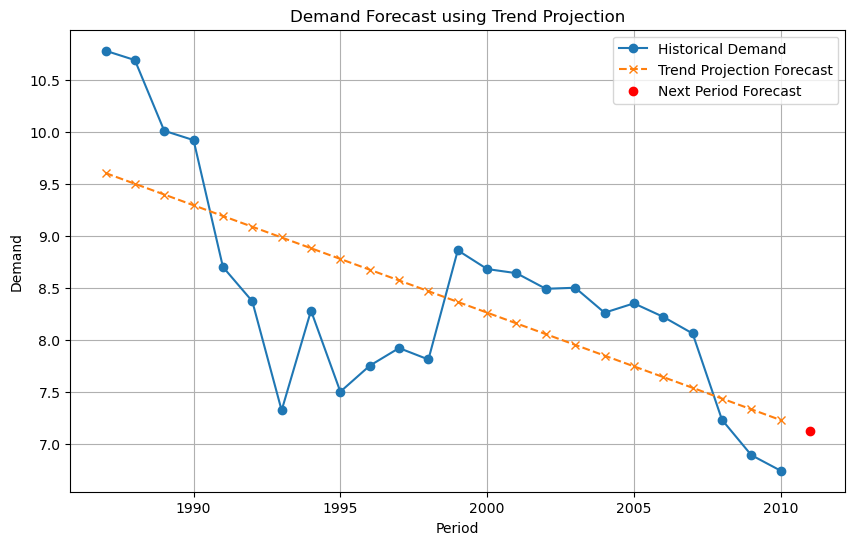

Do you want to project when demand exceeds a certain threshold? (yes/no):  no


No threshold projection requested. Program ended.


In [24]:
#----------------------------------
#2A Regression Analysis Forecasting
#----------------------------------
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# ---- Load your data ----
file_path = r"C:\\Users\\PCAdmin\\OneDrive - Douglas College\\Documents\\4th Semester\\2_Business_Statistics_II\\Python\\DataScratch.xlsx"
sheet_name = "Reg_Forecasting"
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.columns = ['period', 'values']

# Ensure the period is numeric (sometimes Excel stores them as dates/strings)
df['period'] = pd.to_numeric(df['period'], errors='coerce')

# Drop any rows with missing data
df.dropna(inplace=True)

# ---- Prepare the data for trend projection ----
X = df[['period']]  # periods as independent variable
y = df['values']    # demand values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict demand for all periods to evaluate MAD
df['forecast'] = model.predict(X)

# ---- Calculate MAD ----
mad = mean_absolute_error(df['values'], df['forecast'])

# ---- Forecast for the next period ----
next_period = df['period'].max() + 1
next_period_forecast = model.predict([[next_period]])[0]

# ---- Output basic results ----
print("Trend Projection Equation:  y = {:.2f} * period + {:.2f}".format(model.coef_[0], model.intercept_))
print(f"Next Period ({next_period}) Forecast: {next_period_forecast:.2f}")
print(f"MAD: {mad:.2f}")

# ---- Plotting ----
plt.figure(figsize=(10, 6))
plt.plot(df['period'], df['values'], marker='o', label='Historical Demand')
plt.plot(df['period'], df['forecast'], linestyle='--', marker='x', label='Trend Projection Forecast')
plt.scatter(next_period, next_period_forecast, color='red', label='Next Period Forecast', zorder=5)
plt.title('Demand Forecast using Trend Projection')
plt.xlabel('Period')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()

# ---- Ask user if they want to predict threshold exceedance ----
project_answer = input("Do you want to project when demand exceeds a certain threshold? (yes/no): ").strip().lower()

if project_answer in ['yes', 'y']:
    threshold = float(input("Enter the demand threshold to check exceedance: "))

    # Predict from the first period and onward until threshold exceeded
    period = 1
    exceed_period = None
    while True:
        forecast_val = model.predict([[period]])[0]
        if forecast_val > threshold:
            exceed_period = period
            break
        period += 1

    print(f"The forecasted demand first exceeds {threshold} at period: {exceed_period}")

    # Plot with threshold and exceedance point
    plt.figure(figsize=(10, 6))
    plt.plot(df['period'], df['values'], marker='o', label='Historical Demand')
    plt.plot(df['period'], df['forecast'], linestyle='--', marker='x', label='Trend Projection Forecast')
    plt.scatter(next_period, next_period_forecast, color='red', label='Next Period Forecast', zorder=5)

    plt.axhline(y=threshold, color='orange', linestyle=':', label=f'Threshold = {threshold}')
    plt.scatter(exceed_period, model.predict([[exceed_period]])[0], color='purple', s=100, label='First Exceedance')

    plt.title('Demand Forecast with Threshold Exceedance')
    plt.xlabel('Period')
    plt.ylabel('Demand')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("No threshold projection requested. Program ended.")


Sample size (n): 24


Enter the number of predictors (excluding intercept):  1


Number of predictors (k): 1


Enter the significance level (e.g., 0.05):  .05
Enter the lower critical value (dL) from Durbin-Watson table:  1.27
Enter the upper critical value (dU) from Durbin-Watson table:  1.45


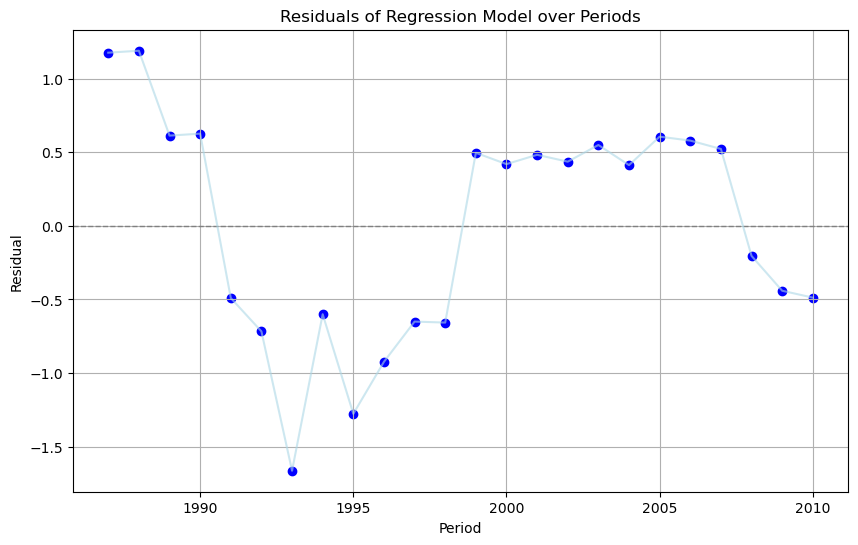


Hypotheses for Durbin-Watson Test:
H0: No positive autocorrelation is present
H1: Positive autocorrelation is present

Durbin-Watson statistic: 0.4660
Sample size (n): 24, Number of predictors (k): 1
Significance level: 0.05
Critical values: Lower (dL) = 1.27, Upper (dU) = 1.45

Conclusion: Reject H0 and conclude that a positive autocorrelation is present.

Since the data appear to be linear and the test of autocorrelation indicates that the presence of positive autocorrelation was detected, the trend projection model is not reliable.


In [23]:
#----------------------------------
#2B Durbin Watson
#----------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

def durbin_watson_test():
    # = Fixed file and sheet name =
    file_path = r"C:\\Users\\PCAdmin\\OneDrive - Douglas College\\Documents\\4th Semester\\2_Business_Statistics_II\\Python\\DataScratch.xlsx"
    sheet_name = "Durbin_Watson"
    
    # = Load data =
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df.columns = ['period', 'values']
    df['period'] = pd.to_numeric(df['period'], errors='coerce')
    df.dropna(inplace=True)
    
    # Automatically determine sample size and display
    n = len(df)
    print(f"Sample size (n): {n}")
    
    # Ask user for number of predictors
    num_predictors = int(input("Enter the number of predictors (excluding intercept): "))
    print(f"Number of predictors (k): {num_predictors}")
    
    # Ask for significance level
    significance_level = float(input("Enter the significance level (e.g., 0.05): "))
    
    # Ask for critical values from DW table based on n, k, and alpha
    dL = float(input("Enter the lower critical value (dL) from Durbin-Watson table: "))
    dU = float(input("Enter the upper critical value (dU) from Durbin-Watson table: "))
    
    # = Fit regression and get residuals =
    model = ols("values ~ period", data=df).fit()
    residuals = model.resid
    
    # Compute Durbin-Watson statistic
    dw_stat = durbin_watson(residuals)
    
    # ==== Plot residuals over periods first ====
    plt.figure(figsize=(10, 6))
    plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
    plt.scatter(df['period'], residuals, color='blue')
    plt.plot(df['period'], residuals, linestyle='-', color='lightblue', alpha=0.6)
    plt.title('Residuals of Regression Model over Periods')
    plt.xlabel('Period')
    plt.ylabel('Residual')
    plt.grid(True)
    plt.show()
    
    # Hypotheses
    print("\nHypotheses for Durbin-Watson Test:")
    print("H0: No positive autocorrelation is present")
    print("H1: Positive autocorrelation is present")
    
    # Print test results
    print(f"\nDurbin-Watson statistic: {dw_stat:.4f}")
    print(f"Sample size (n): {n}, Number of predictors (k): {num_predictors}")
    print(f"Significance level: {significance_level}")
    print(f"Critical values: Lower (dL) = {dL}, Upper (dU) = {dU}")
    
 # ===== Decision =====
    if dw_stat < dL:
        conclusion = "Reject H0 and conclude that a positive autocorrelation is present."
        autocorr_result = "was detected"
        reliability = "is not reliable"
    elif dw_stat > dU:
        conclusion = "Fail to reject H0 and conclude that no positive autocorrelation is present."
        autocorr_result = "was not detected"
        reliability = "is reliable"
    else:
        conclusion = "The test is inconclusive."
        autocorr_result = "was inconclusive"
        reliability = "has unknown reliability"

    
    print(f"\nConclusion: {conclusion}")


    # ===== Additional final interpretation =====
    # Simple check for "appears linear" from residuals spread (basic visual assumption)
    appears_linear = "appear"  # Default to "appear" since Durbin-Watson test doesn't check linearity directly
    print(f"\nSince the data {appears_linear} to be linear and the test of autocorrelation "
          f"indicates that the presence of positive autocorrelation {autocorr_result}, "
          f"the trend projection model {reliability}.")

# Run the test
durbin_watson_test()


Determine the DurbindashWatson statistic.
dequals
  
. 47
​(Round to two decimal places as​ needed.)
Part 6
Identify the critical values.
d Subscript Lequals
  
1.27
d Subscript Uequals
  
1.45
​(Round to two decimal places as​ needed.)
Part 7
State the conclusion. Choose the correct answer below.
A.Fail to reject Upper H 0 and conclude that no positive autocorrelation is present.
Fail to reject Upper H 0 and conclude that no positive autocorrelation is present.
B.
Fail to reject H Subscript 0 and conclude that a positive autocorrelation is present.
C.
Reject H Subscript 0 and conclude that no positive autocorrelation is present.
D.
The test is inconclusive.
E.Reject Upper H 0 and conclude that a positive autocorrelation is present.
Reject Upper H 0 and conclude that a positive autocorrelation is present.
Your answer is correct.
Part 8
e. What limitations do you foresee with this forecasting method projecting mortgage rates several years into the​ future? Select all answers that apply.
A.
The trend projection will eventually predict mortgage rates of​ 0%, or less than​ 0%, which does not make sense in this context.
B.
Trend projections only forecast accurately for data with strong negative autocorrelation.
C.
Mortgage rates are eventually going to​ increase, while the trend projection predicts them to decrease forever.
D.
The trend projection is linear. While the data appear to be linear over the given time​ period, it is not safe to assume that they will continue to be.Determine the DurbindashWatson statistic.
dequals
  
. 47
​(Round to two decimal places as​ needed.)
Part 6
Identify the critical values.
d Subscript Lequals
  
1.27
d Subscript Uequals
  
1.45
​(Round to two decimal places as​ needed.)
Part 7
State the conclusion. Choose the correct answer below (A C D are correct).
A.Fail to reject Upper H 0 and conclude that no positive autocorrelation is present.
Fail to reject Upper H 0 and conclude that no positive autocorrelation is present.
B.
Fail to reject H Subscript 0 and conclude that a positive autocorrelation is present.
C.
Reject H Subscript 0 and conclude that no positive autocorrelation is present.
D.
The test is inconclusive.
E.Reject Upper H 0 and conclude that a positive autocorrelation is present.
Reject Upper H 0 and conclude that a positive autocorrelation is present.
Your answer is correct.
Part 8
e. What limitations do you foresee with this forecasting method projecting mortgage rates several years into the​ future? Select all answers that apply.
A.
The trend projection will eventually predict mortgage rates of​ 0%, or less than​ 0%, which does not make sense in this context.
B.
Trend projections only forecast accurately for data with strong negative autocorrelation.
C.
Mortgage rates are eventually going to​ increase, while the trend projection predicts them to decrease forever.
D.
The trend projection is linear. While the data appear to be linear over the given time​ period, it is not safe to assume that they will continue to be.